In [1]:
suppressMessages(library(ArchR))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))
suppressMessages(library(cowplot))
suppressMessages(library(dplyr))
suppressMessages(library(tidyr))
suppressMessages(library(Ipaper))

In [2]:
set.seed(42)
addArchRThreads(threads = 64)

Setting default number of Parallel threads to 64.



In [3]:
proj <- loadArchRProject("./ArchRProject", showLogo = FALSE)

Successfully loaded ArchRProject!



In [7]:
markersGS <- getMarkerFeatures(
    ArchRProj = proj, 
    useMatrix = "GeneScoreMatrix", 
    groupBy = "Clusters",
    bias = c("TSSEnrichment", "log10(nFrags)"),
    testMethod = "wilcoxon"
)

ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-1f51472ce63b38-Date-2025-02-25_Time-01-25-52.728932.log
If there is an issue, please report to github with logFile!



MatrixClass = Sparse.Double.Matrix

2025-02-25 01:25:53.173393 : Matching Known Biases, 0.006 mins elapsed.

###########
2025-02-25 01:28:56.692052 : Completed Pairwise Tests, 3.065 mins elapsed.
###########

ArchR logging successful to : ArchRLogs/ArchR-getMarkerFeatures-1f51472ce63b38-Date-2025-02-25_Time-01-25-52.728932.log



In [8]:
saveRDS(markersGS, file = "./ArchRProject/markersGS.rds")

In [4]:
markersGS <- readRDS(file = "./ArchRProject/markersGS.rds" )

In [12]:
markerList <- getMarkers(markersGS, cutOff = "FDR <= 0.05 & Log2FC >= 1.25")
## Clusters差异基因，按照MeanDiff排序，并保存为Excel文件
markerList <- lapply(markerList, as.data.frame)
library(writexl)

for(i in 1:length(markerList)){
    markerList[[i]] <- markerList[[i]][order(-markerList[[i]]$MeanDiff), ]
}

WriteXLS::WriteXLS(markerList,
                   ExcelFileName = "./ArchRProject/markersGS_MeanDiff.xlsx",
                   SheetNames = names(markerList))

In [13]:
markerList <- getMarkers(markersGS, cutOff = "FDR <= 0.05 & Log2FC >= 1.25")
## Clusters差异基因，按照FDR排序，并保存为Excel文件
markerList <- lapply(markerList, as.data.frame)

for(i in 1:length(markerList)){
    markerList[[i]] <- markerList[[i]][order(markerList[[i]]$FDR), ]
}
WriteXLS::WriteXLS(markerList,
                   ExcelFileName = "./ArchRProject/markersGS_FDR.xlsx",
                   SheetNames = names(markerList))

In [5]:
# Heatmap
## marker genes, 根据05_01_annotation中的显著表达来确定绘图的marker genes
markerGenes <- c(
    "CD38", "IGLL5", "PAX5", "ITGAM", "FAP",
    "FOXP3", "VIM", "PDCD1", "CD8A", "CD3D",
    "CD4", "CXCL12", "THY1", "PECAM1", "KDR",
    "EPACM", "ERBB2", "FOXA1", "KRT8", "ESR1",
    "KRT14", "CDH1"
)

heatmapGS <- plotMarkerHeatmap(
  seMarker = markersGS, 
  cutOff = "FDR <= 0.05 & Log2FC >= 1.25", 
  labelMarkers = markerGenes
)

options(repr.plot.height = 10, repr.plot.width = 10)
svg("/data/hanxue/BCY_ATAC/joint_output/MarkerGeneScore.svg",width = 10, height = 10)
ComplexHeatmap::draw(heatmapGS, 
                     heatmap_legend_side = "bot", 
                     annotation_legend_side = "bot")
dev.off()

ArchR logging to : ArchRLogs/ArchR-plotMarkerHeatmap-3a92907df19dcb-Date-2025-03-21_Time-02-55-35.583313.log
If there is an issue, please report to github with logFile!

Printing Top Marker Genes:

C1:

	TMEM240, ARHGEF16, TNFRSF25, UBXN10, CAMK2N1, SERINC2, LINC01226, ARTN, KNCN, CYP4A22, HOOK1, RNVU1-15, NBPF20, GPR89A, PDZK1

C2:

	CELA2B, FAM131C, LOC284632, SLC30A2, GUCA2A, CYP4Z1, RAB3B, TTC22, LEXM, OVGP1, MAB21L3, LINGO4, ATP1A2, ATP1A4, C1orf105

C3:

	CASQ1, OR6F1, OR1C1, PCDH20, FAM174B, LINC00923, ARRDC4, LINC01582, FAM169B, IGF1R, MIR4714, PGPEP1L, SYNM, TTC23, HSP90B2P

C4:

	CDA, BEND5, PRKAA2, SLC44A5, AK5, LINC01555, GBP7, HAO2-IT1, KCNMA1-AS3, CUZD1, TCERG1L-AS1, TPH1, MIR1252, LINC02410, SLITRK6

C5:

	MIR6727, LINC01351, TRIM6, RAG2, YEATS4, LOC101928002, RAB3IP, LOC100130238, LINC00359, SERPINA6, MEG9, SULT1A1, SGK494, SPAG5-AS1, KIAA0100

C6:

	CCDC190, LOC101926942, FRG2B, ARNTL2-AS1, PCDH9-AS3, BAG5, MRPL12, LINC01882, DSG2-AS1, STARD6, LINC01538, GTSCR1, LINC01

 [1] "CD38"   "IGLL5"  "PAX5"   "ITGAM"  "FAP"    "FOXP3"  "VIM"    "PDCD1" 
 [9] "CD8A"   "CD3D"   "CD4"    "CXCL12" "THY1"   "PECAM1" "KDR"    "EPACM" 
[17] "ERBB2"  "FOXA1"  "KRT8"   "ESR1"   "KRT14"  "CDH1"  


Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotMarkerHeatmap-3a92907df19dcb-Date-2025-03-21_Time-02-55-35.583313.log



pdf 
  2

In [ ]:
plotPDF(heatmapGS, name = "GeneScores-Marker-Heatmap.pdf", width = 8, height = 6, ArchRProj = proj, addDOC = FALSE)

Plotting ComplexHeatmap!



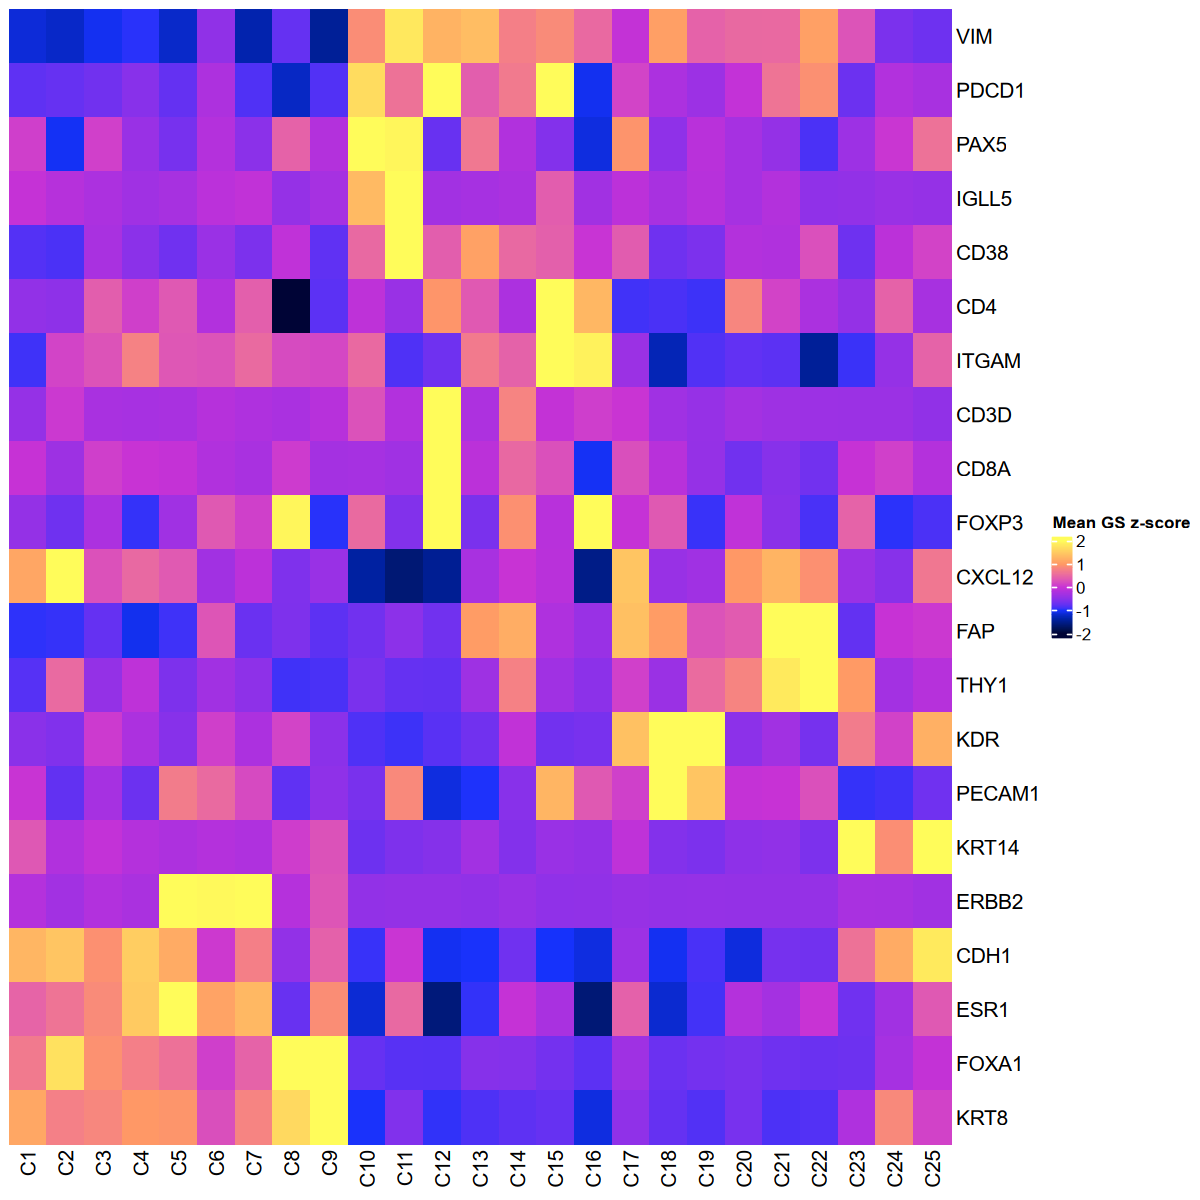

In [6]:
## 绘制只有marker基因的热图，Mean GS z-score

### 提取差异基因中在marker genes中的基因
idx <- which(mcols(markersGS)$name %in% markerGenes)
### 提取指定行，为矩阵
mtx <- assays(markersGS[idx,])$Mean %>% `rownames<-`(., mcols(markersGS)$name[idx])
### 标准化（z-score），并转置
mtx <- t(scale(t(mtx)))
### 定义层次聚类函数
fh <- function(x) hclust(dist(x), method="ward.D2")
### 定义颜色函数
col_fun1 <- colorRamp2(c(-2,-1,0,1,2), paletteContinuous(set = "horizonExtra", n = 5))

ht1 <- Heatmap(mtx, name = "Mean GS z-score", cluster_rows = fh, cluster_columns = F, show_row_dend = F, col = col_fun1)
# svg("/data/hanxue/BCY_ATAC/joint_output/Mean GS z-score.svg",width = 10, height = 10)
p3 <- draw(ht1)
p3
# dev.off()

In [7]:
mtx

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,⋯,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25
VIM,-1.16287304,-1.23676497,-1.04436571,-0.971685589,-1.23356970,-0.48497199,-1.36093267,-0.75972469,-1.4771106,0.86711078,⋯,0.48652721,-0.03850349,1.0590487,0.4153683,0.48453718,0.4892246962,1.067610104,0.27910088,-0.628757293,-0.70941473
CXCL12,1.12792349,2.34364444,0.25716903,0.481815229,0.33435994,-0.35332204,-0.11154863,-0.60781625,-0.4194566,-1.42360948,⋯,-1.55451675,1.43288340,-0.4276006,-0.3554901,0.99291290,1.2628867646,0.903067638,-0.39873431,-0.548004126,0.63284345
CD3D,-0.45033630,0.04987766,-0.28310121,-0.302265629,-0.28267241,-0.16232799,-0.22755058,-0.27646429,-0.1585276,0.25726969,⋯,0.08988587,0.01758291,-0.3577211,-0.4381039,-0.32510552,-0.3747821664,-0.393948938,-0.40175386,-0.401693025,-0.47495285
THY1,-0.82879127,0.49262122,-0.45273142,-0.089090972,-0.61634012,-0.34859122,-0.50311393,-0.91224036,-0.8806093,-0.63714725,⋯,-0.51511361,0.10509404,-0.4060865,0.5106722,0.76965806,1.8094419672,3.518004318,1.01147931,-0.333681604,-0.16543219
CD4,-0.47124175,-0.49684129,0.37666278,0.101032217,0.32449888,-0.20241376,0.38583374,-2.05964029,-0.8048965,-0.08804807,⋯,1.28816545,-0.91076304,-0.8784569,-0.9234279,0.79153598,0.1325374510,-0.266437448,-0.45641416,0.419674547,-0.29622274
KRT8,1.13433527,0.72370342,0.79786323,0.992865473,0.95289139,0.23344502,0.76716270,1.63946399,2.5864067,-0.99483567,⋯,-1.12237340,-0.48862400,-0.7605929,-0.8467111,-0.64998121,-0.8730476546,-0.844765779,-0.22546895,0.821915476,0.12125392
FOXA1,0.66011191,1.71654228,0.90598322,0.715866537,0.56803938,0.09697198,0.42452350,2.07108957,2.7646294,-0.75556183,⋯,-0.80185385,-0.36996133,-0.7294356,-0.6771344,-0.63920627,-0.7065625770,-0.730774716,-0.71388598,-0.310815696,-0.03695199
ITGAM,-0.91572360,0.13479612,0.27442861,0.743520724,0.30451987,0.27909025,0.49931165,0.19502094,0.1655299,0.48789247,⋯,1.89176311,-0.40099581,-1.3247295,-0.8503288,-0.77665043,-0.8017110940,-1.470603807,-0.93060296,-0.451013224,0.42359753
CDH1,1.27865592,1.43124442,0.90433654,1.518724887,1.17278188,0.05448144,0.71777792,-0.46838136,0.4081852,-0.93647537,⋯,-1.12622266,-0.38286657,-1.0414888,-0.8842630,-1.13899245,-0.6619927966,-0.687030965,0.57808008,1.169649372,1.80995075
ERBB2,-0.18388821,-0.33857883,-0.20092843,-0.269796245,2.54174955,1.96430842,3.21134844,-0.17211061,0.2921746,-0.46944418,⋯,-0.48130000,-0.43036120,-0.4564637,-0.4500334,-0.45309798,-0.4537718331,-0.448032108,-0.27820781,-0.287063579,-0.34878046


In [12]:
plotPDF(ht1, name = "Mean GS z-score.pdf", width = 8, height = 6, ArchRProj = proj, addDOC = FALSE)

Plotting ComplexHeatmap!



In [13]:
# scATAC signal tracks
p <- plotBrowserTrack(
    ArchRProj = proj,
    groupBy = "Clusters",
    geneSymbol = markerGenes,
    upstream = 50000,
    downstream = 50000
)
plotPDF(
    plotList = p, 
    name = "Plot-Tracks-Marker-Genes_01.pdf", 
    ArchRProj = proj, 
    addDOC = FALSE, width = 5, height = 5
)

ArchR logging to : ArchRLogs/ArchR-plotBrowserTrack-3f86e022ae9ac0-Date-2025-03-05_Time-12-35-47.856915.log
If there is an issue, please report to github with logFile!

2025-03-05 12:35:47.920245 : Validating Region, 0.001 mins elapsed.



GRanges object with 20 ranges and 2 metadata columns:
       seqnames              ranges strand |     gene_id      symbol
          <Rle>           <IRanges>  <Rle> | <character> <character>
   [1]     chr4   15778275-15853230      + |         952        CD38
   [2]    chr22   22887780-22896107      + |   100423062       IGLL5
   [3]     chr9   36833275-37034185      - |        5079        PAX5
   [4]    chr16   31259990-31332892      + |        3684       ITGAM
   [5]     chr2 162170684-162243535      - |        2191         FAP
   ...      ...                 ...    ... .         ...         ...
  [16]    chr17   39687914-39728662      + |        2064       ERBB2
  [17]    chr14   37589984-37595110      - |        3169       FOXA1
  [18]    chr12   52897187-52949954      - |        3856        KRT8
  [19]     chr6 151656691-152129619      + |        2099        ESR1
  [20]    chr17   41582279-41586921      - |        3861       KRT14
  -------
  seqinfo: 24 sequences from hg38 genom

2025-03-05 12:35:48.020538 : Adding Bulk Tracks (1 of 20), 0.003 mins elapsed.

Length of unique values greater than palette, interpolating..

2025-03-05 12:36:31.816106 : Adding Feature Tracks (1 of 20), 0.733 mins elapsed.

2025-03-05 12:36:31.914595 : Adding Gene Tracks (1 of 20), 0.734 mins elapsed.

2025-03-05 12:36:32.618041 : Plotting, 0.746 mins elapsed.

2025-03-05 12:36:34.807485 : Adding Bulk Tracks (2 of 20), 0.783 mins elapsed.

Length of unique values greater than palette, interpolating..

2025-03-05 12:36:40.067309 : Adding Feature Tracks (2 of 20), 0.87 mins elapsed.

2025-03-05 12:36:40.134408 : Adding Gene Tracks (2 of 20), 0.871 mins elapsed.

2025-03-05 12:36:40.427466 : Plotting, 0.876 mins elapsed.

2025-03-05 12:36:42.577117 : Adding Bulk Tracks (3 of 20), 0.912 mins elapsed.

Length of unique values greater than palette, interpolating..

2025-03-05 12:37:21.898414 : Adding Feature Tracks (3 of 20), 1.567 mins elapsed.

2025-03-05 12:37:21.973815 : Adding Gene Tr

NULL
_msg_send errno: 4 strerror: Interrupted system call


Plotting Gtable!

Plotting Gtable!

Plotting Gtable!

Plotting Gtable!

Plotting Gtable!

Plotting Gtable!

Plotting Gtable!

Plotting Gtable!

Plotting Gtable!

Plotting Gtable!

Plotting Gtable!



L


Plotting Gtable!



NULL


Plotting Gtable!



NULL


Plotting Gtable!



NULL


Plotting Gtable!



NULL


Plotting Gtable!



NULL


Plotting Gtable!



NULL


Plotting Gtable!



NULL


Plotting Gtable!



NULL


In [ ]:
p4 <- plotBrowserTrack(
    ArchRProj = proj, 
    groupBy = "Clusters", 
    geneSymbol = c("EPCAM","VIM","KRT18","FLT4","THY1","CD3D","PAX5","IGLL5","ITGAX"), 
    upstream = 10000, # 10kb
    downstream = 10000, # 10kb
    plotSummary = c("bulkTrack","geneTrack")
)
plotPDF(
    p4,
    name = "Plot-Tracks-Marker-Genes_02.pdf", 
    ArchRProj = proj, 
    addDOC = FALSE, 
    width = 7, 
    height = 10
    )

ArchR logging to : ArchRLogs/ArchR-plotBrowserTrack-1196a264839490-Date-2024-07-04_Time-07-57-55.779588.log
If there is an issue, please report to github with logFile!

2024-07-04 07:57:55.86018 : Validating Region, 0.001 mins elapsed.



GRanges object with 9 ranges and 2 metadata columns:
      seqnames              ranges strand |     gene_id      symbol
         <Rle>           <IRanges>  <Rle> | <character> <character>
  [1]     chr2   47345158-47387601      + |        4072       EPCAM
  [2]    chr10   17228259-17237593      + |        7431         VIM
  [3]    chr12   52948871-52952901      + |        3875       KRT18
  [4]     chr5 180601506-180649624      - |        2324        FLT4
  [5]    chr11 119417378-119424985      - |        7070        THY1
  [6]    chr11 118338954-118342744      - |         915        CD3D
  [7]     chr9   36833275-37034185      - |        5079        PAX5
  [8]    chr22   22887780-22896107      + |   100423062       IGLL5
  [9]    chr16   31355134-31382997      + |        3687       ITGAX
  -------
  seqinfo: 24 sequences from hg38 genome


2024-07-04 07:57:55.974653 : Adding Bulk Tracks (1 of 9), 0.003 mins elapsed.

Length of unique values greater than palette, interpolating..

2024-07-04 07:57:59.099376 : Adding Gene Tracks (1 of 9), 0.055 mins elapsed.

2024-07-04 07:57:59.693769 : Plotting, 0.065 mins elapsed.

2024-07-04 07:58:01.757672 : Adding Bulk Tracks (2 of 9), 0.1 mins elapsed.

Length of unique values greater than palette, interpolating..

2024-07-04 07:58:04.070955 : Adding Gene Tracks (2 of 9), 0.138 mins elapsed.

2024-07-04 07:58:04.639509 : Plotting, 0.148 mins elapsed.

2024-07-04 07:58:06.871437 : Adding Bulk Tracks (3 of 9), 0.185 mins elapsed.

Length of unique values greater than palette, interpolating..

2024-07-04 07:58:09.248578 : Adding Gene Tracks (3 of 9), 0.224 mins elapsed.

2024-07-04 07:58:09.829644 : Plotting, 0.234 mins elapsed.

2024-07-04 07:58:11.871835 : Adding Bulk Tracks (4 of 9), 0.268 mins elapsed.

Length of unique values greater than palette, interpolating..

2024-07-04 07:58:

NULL


Plotting Gtable!



NULL


Plotting Gtable!



NULL


Plotting Gtable!



NULL


Plotting Gtable!



NULL


Plotting Gtable!



NULL


Plotting Gtable!



NULL


Plotting Gtable!



NULL


Plotting Gtable!



NULL
